In [22]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [24]:
#Basic Info
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Summary statistics
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
#Missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [29]:
# Drop 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)
else:
    print("Column 'Cabin' not found in the DataFrame.")


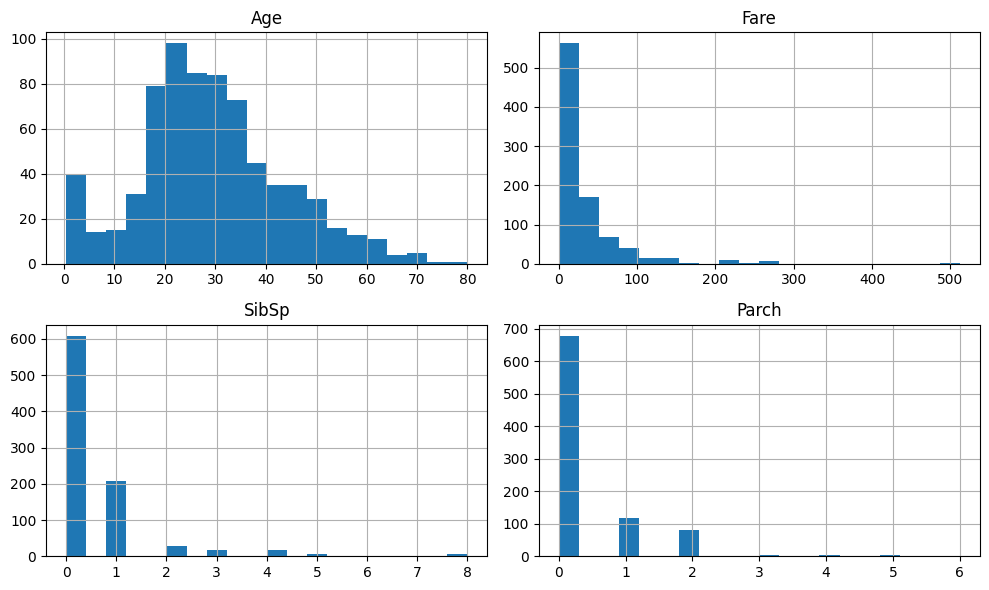

In [30]:
# Histograms for numeric features
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_features].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

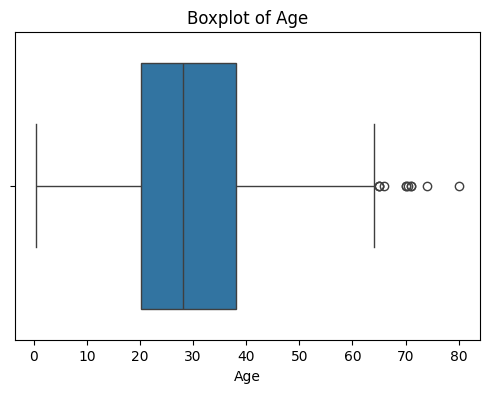

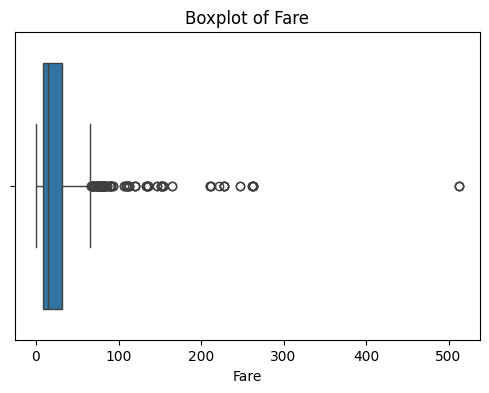

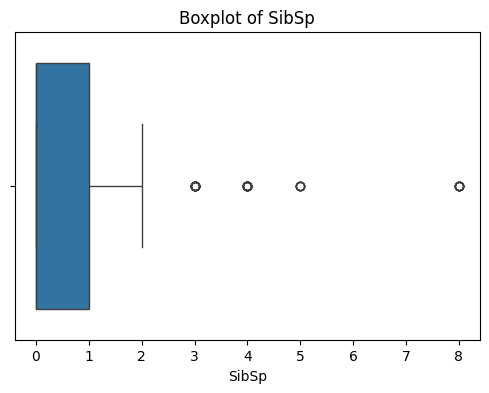

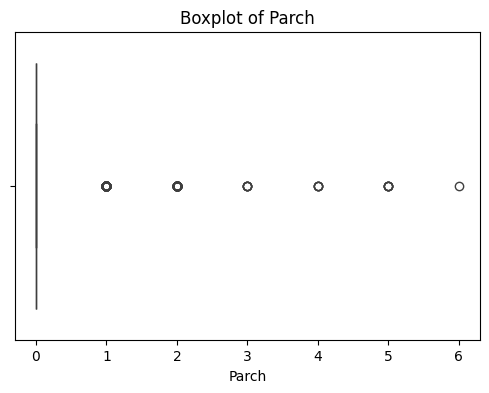

In [31]:
# Boxplots to detect outliers
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


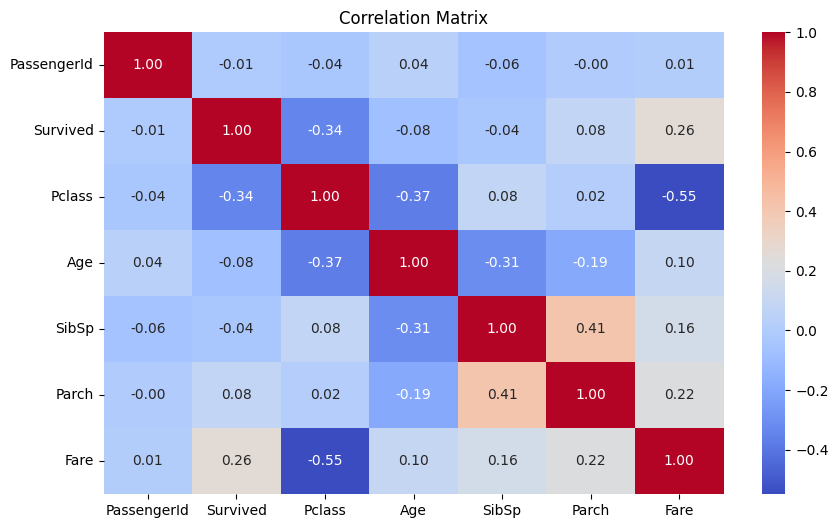

In [32]:
# Correlation Matrix Heatmap
import numpy as np  # in case it's not already imported

# Select only numeric features
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


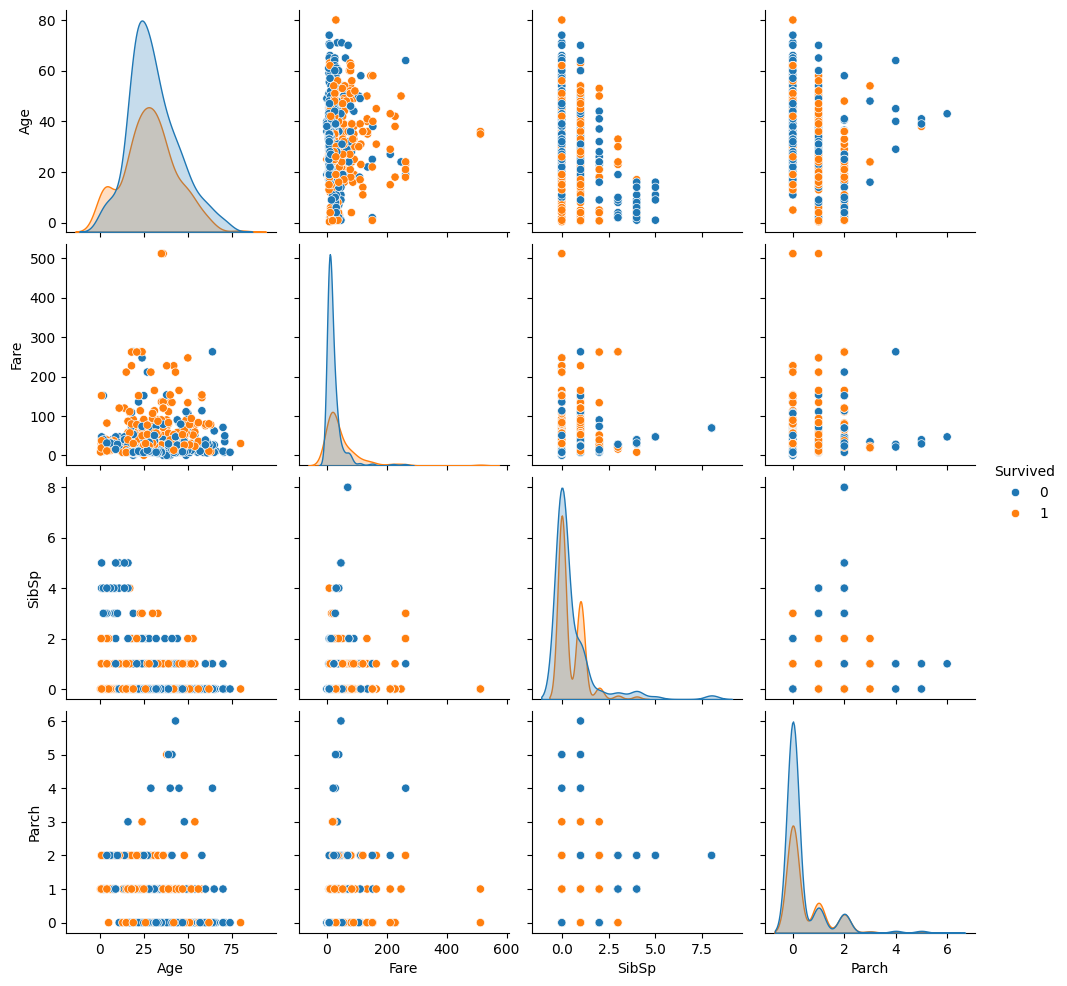

In [33]:
# Pairplot with hue='Survived'
sns.pairplot(df[numeric_features + ['Survived']], hue='Survived')
plt.show()

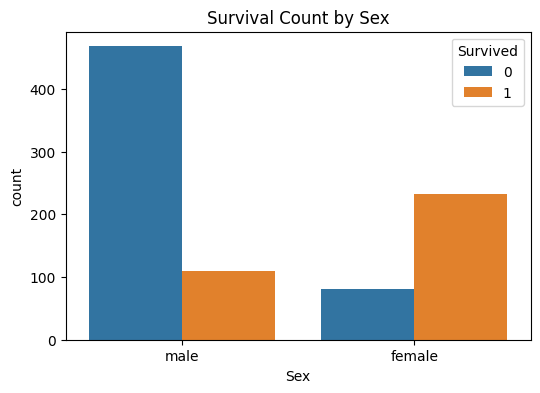

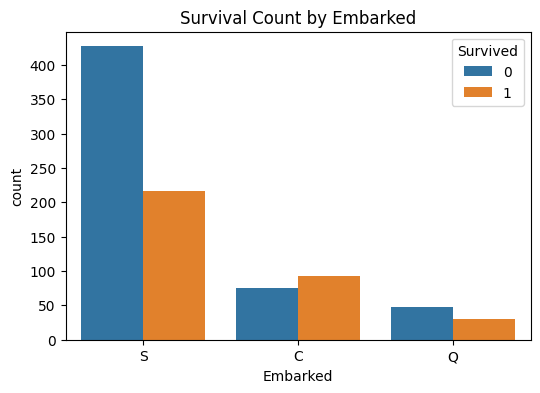

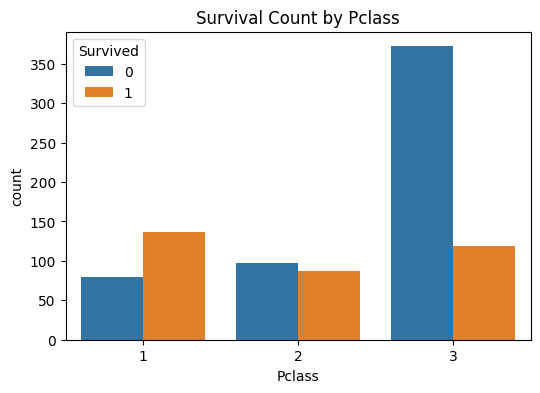

In [34]:
# Count plots for categorical variables
categorical_features = ['Sex', 'Embarked', 'Pclass']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, hue='Survived')
    plt.title(f"Survival Count by {col}")
    plt.show()

In [35]:
# Skewness
print("\nSkewness:")
print(df[numeric_features].skew())


Skewness:
Age      0.389108
Fare     4.787317
SibSp    3.695352
Parch    2.749117
dtype: float64


In [36]:
# Final Thoughts
print("\nEDA Summary:")
print("- Most passengers were in 3rd class and male.")
print("- Higher survival rate in females and 1st class passengers.")
print("- 'Fare' and 'Pclass' show notable correlations with survival.")
print("- Some skewness observed in 'Fare'.")


EDA Summary:
- Most passengers were in 3rd class and male.
- Higher survival rate in females and 1st class passengers.
- 'Fare' and 'Pclass' show notable correlations with survival.
- Some skewness observed in 'Fare'.
